# Project: Bank Marketing Advertising Customer Segmentation

This jupyter notebook will have the following sections: 
1. Business Problem
2. Datase-Background
3. Exploratory Analysis and Visualization
4. Customer Segmentation
5. Comparing Results 
6. Conclusion
7. Business Recommendation


In [1]:
import sys
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, normalize,MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Importing deep learning libraries
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

# import pycountry_convert as pc

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Matplotl: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Tensorflow:{}'.format(tf.__version__))
print('Keras:{}'.format(keras.__version__))

import warnings
warnings.filterwarnings("ignore")


Using TensorFlow backend.


Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.0.4
Numpy: 1.18.1
Matplotl: 3.1.3
Seaborn: 0.10.0
Tensorflow:2.0.0
Keras:2.3.1


# 1. Business Problem: 

A marketing team at one of New York City Banks wants to launch a targeted ad marketing campaign by segmenting customers into potential groups based on given features in the data. In this project, I will leverage both data science and machine learning tools to perform market segmentation to assets marketing department to understand customers' spending habits develop customer oriented marketing strategies.

# 2. Dataset Background

The dataset contains records for credit card purchases transactions for NYC bank's customers. The history for those purchases records goes back for 6 months. The data contains 18 columns and 8950 rows where are all entries are numerical types excpet CUSTID which is in string format. 


* CUSTID: Customer Identification of Credit Card holder
* BALANCE: Amount left in customer's account to make purchase. 
* BALANCE_FREQUENCY: How frequently the Balance is updated,score between 0 & 1 (1=frequently updated, 0=not frequently updated)
* PURCHASES: Amount of purchases made from account
* ONEOFFPURCHASES: Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES: Amount of purchase done in installment
* CASH_ADVANCE: Cash in advance given by the user
* PURCHASES_FREQUENCY: How frequently the Purchases are being made,score between 0 & 1 (1=frequently purchased, 
0=not frequently purchased)
* CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
* PURCHASES_TRX: Number of purchase transactions made
* CREDIT_LIMIT: Limit of Credit Card for user
* PAYMENTS: Amount of Payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payments made by user  
* PRC_FULL_PAYMENT: Percent of full payment paid by user
* TENURE: Tenure of credit card service for user

In [2]:
# Reading bank data 
df = pd.read_csv("Marketing_data.csv")
# Get the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
# Display the data
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Understand Statisitcs of Data**

* Average balance is 1,564.47 with a max balance of 19,043.14. 

* Average balance frequency of 0.877 looks good, we can see that a lot of customers keep updating their accounts by paying account balance. 

* Average purschases is 1003.20, however, the max purchase of 49,039.57, this is absolutely an outlier, and if we remove it, we may observe different mean! 

* Mean of one off purchases is around 600, pretty reasonable, but we have a high purchase in this category with 40,761.25 in one time.

* Cash advance column has a mean of 979, and max cash of 47,137. Those customer thay got to pay more for interest fees (%19.99 - % 24.99). 

* Average of purchase frequency is 0.5. 
* Average of one off purchase frequency, installments frequecy, cash advance frequency is generally low. 
* Average credit limit is around 4,500 and max of 30,000. 
* Average percent of full payment is %15. 
* Average tenure is 11 years. 

In [4]:
# Get the statistics of features
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


An interesting customer with highest ONE OFF PURCHASE grab my attention.This customer has a high left balance, has a high balance frequency, total purchases of $49,039.57. Unfortunately, s/he pays a lot for installment, has low cash in advance and low cash advance frequency (not using it at all, smart cutomer!) and pays percentage in full payment of %25 rate.  

In [5]:
# Let's who made one off purchase of $40,761. 
df[df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


Another interesting customer to observe is the one with the highest cash in advance (use credit card for loan). This customer made 123 cash advance transactions and never paid credit card in full payment!

In [6]:
# Let's who made a cash advance of $47,137,21. 
df[df['CASH_ADVANCE'] == df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# 3. Exploratory Data Analysis

EDA is an essential process to understand data and its quality. In fact, it will help us to understand customers spending habits as well as identifiying potenial groups! For that, we would like to investigate if any missing values and duplicates are existed within dataset. Through this section, the following visualization will be performed: 

1. Distribution Plot for Each Feature. 
2. Pearson Correlation (Heat Map)

In [7]:
# let's see if we have any missing values, luckily we do not have! 
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Filling missing values with median for MINIMUM PAYMENT column
df.loc[(df["MINIMUM_PAYMENTS"].isnull() == True), "MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].median()

In [9]:
df.dropna(inplace=True)

In [10]:
# Let's check duplicates values in columns 
df.duplicated().sum()

0

In [11]:
# Drop CUST_ID columns from the data 
df.drop("CUST_ID", axis=1,inplace=True)

## 3.1. Distribution Plots

Distribution plots usually used to visualize probability density of a continuous varible. In this section, we would use it to understand feature distribution and get glance of some customers behaviours. From the below Displots, the following points can be observed: 

* Balance: Majority of customers are within range of 0-1,000. 
* Balance Frequency: Only few customers who do not update their balance. 
* Purchase: Majority of customer population is within 0-1,500.
* One Off Purchase: Most of customers do not purchase items with high payment at go! 
* Purchase Frequency: It is telling us that there are actually 2 groups of customers. Helpful tips for clustering. 
* Cash Advance: Only few customers use cash in advance, majort do not! 
* Credit Limit: There is variability in credit limit. 
* PRC Full Payment: Majority of customers do not pay their credits in full payment. 

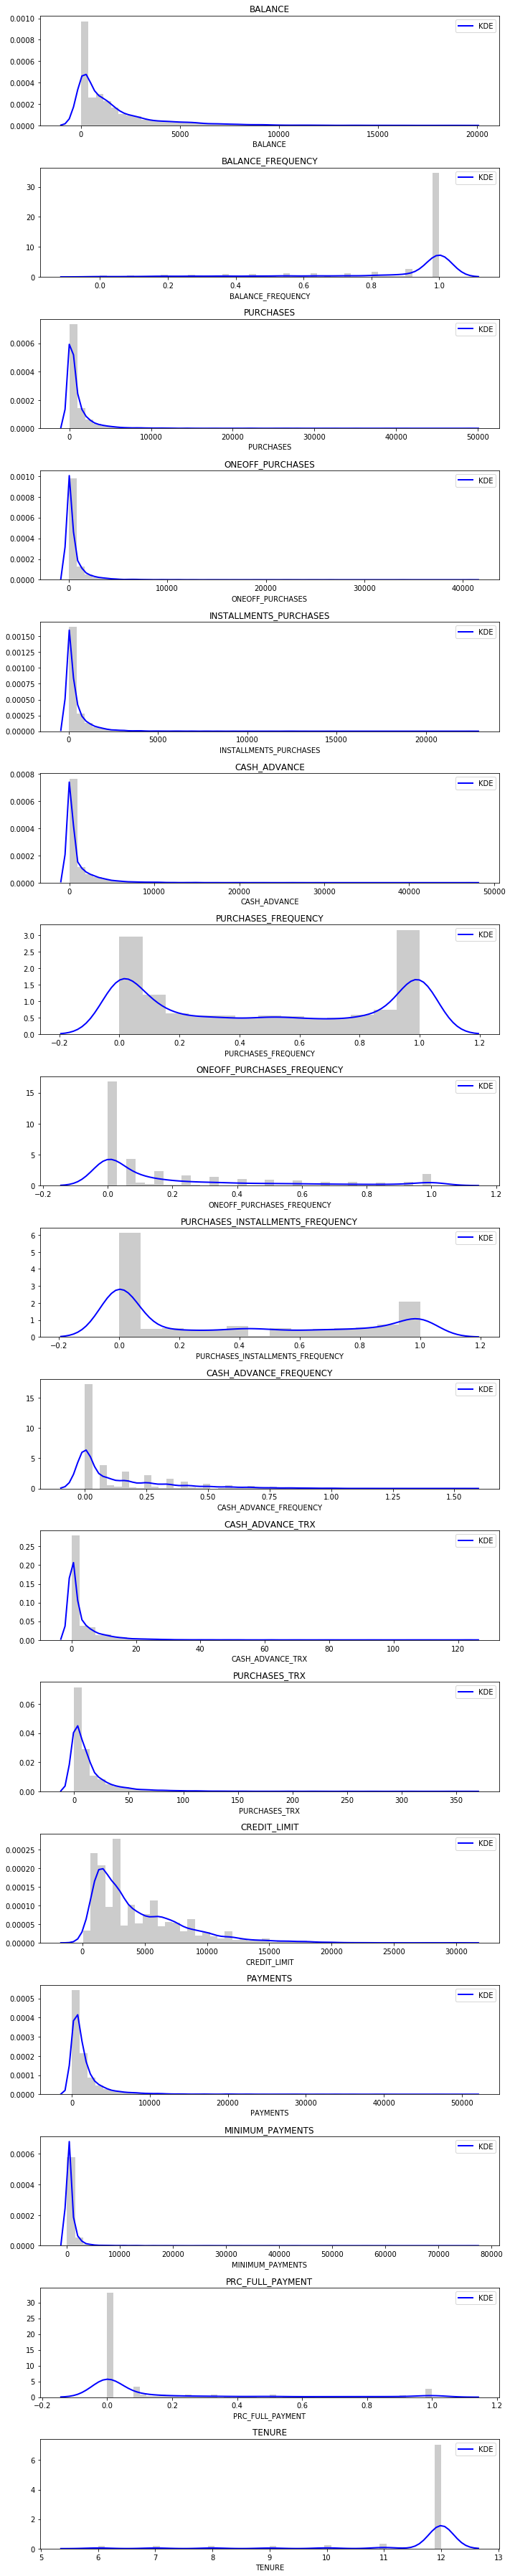

In [12]:
# Distribution plot of features
plt.figure(figsize = (10,50))
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color":"blue", "lw":2, "label":"KDE"},hist_kws={"color":"gray"})
    plt.title(df.columns[i])

plt.tight_layout()

## 3.2. Correlation
In this section, we would focus on the high correlation coefficients: 

* There is a high correlation between ONEOFF_PURCHASES and PURCHASES. This commonly expected from customer habits.
* Another quite high correlation can be observed between ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES,PURCHASE_TRX and PAYMENT.
* Another relatively high correlation between CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX. 
* PURCHASE_INSTALLMENT_FREQUENCY is highly linearly correlated with PURCHASE_FREQUENCY.  

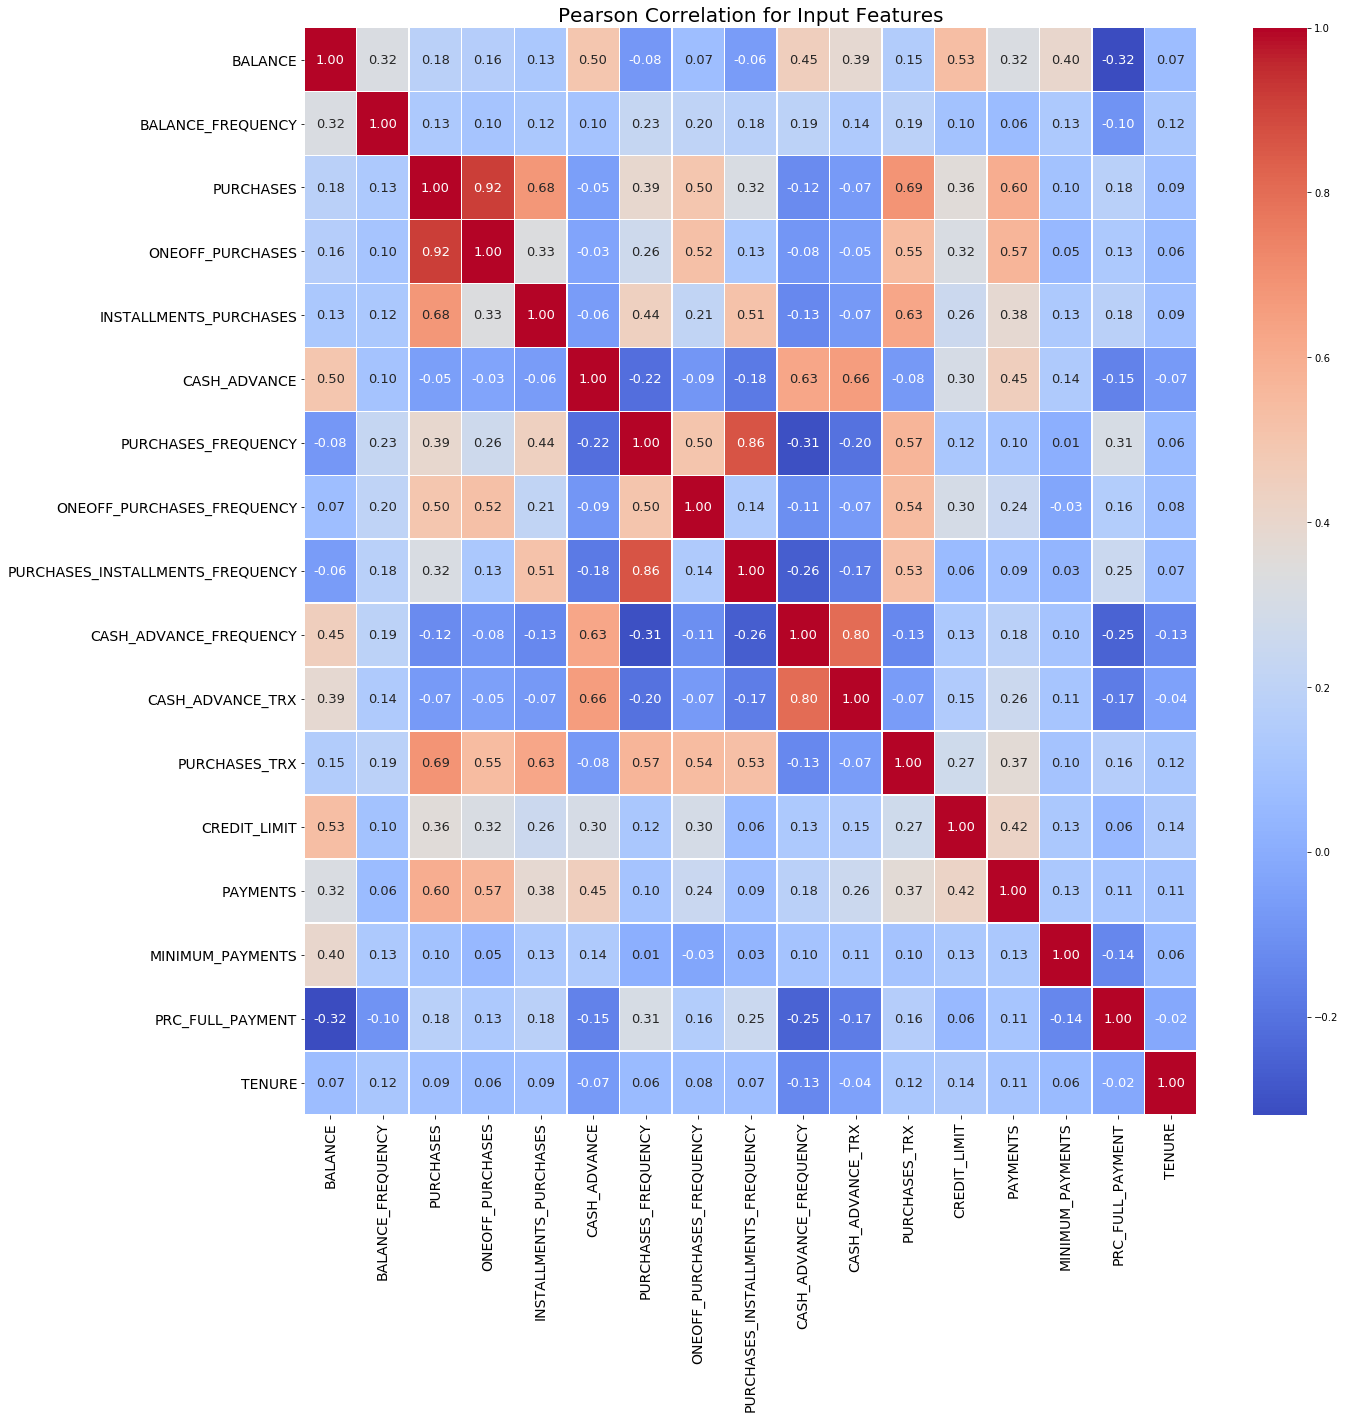

In [13]:
# Get full correlation of features 
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True, linewidths=.5, fmt= '.2f',annot_kws={"size":13},ax = ax)
ax.axes.set_title("Pearson Correlation for Input Features",fontsize=20)
ax.tick_params(labelsize=14);

Customer segmentation is a subdivision of marketing analytics that discrete customer groups that share similar characteristics. It helps companies to develop uniquely appealing products and services. 

Since the business problem focuses on developing marketing strategies on targeted ads through understanding customers spending habits, the best ML model to address the following problem is K-Means. 

**K-Means:** 
It is an unsupervised machine learning algorithm that works by grouping observations with similar attribute values together by measuring Euclidean distance between points. The model iteratively update centroid of Euclidean distance by minimize objective function. The objective function used here is the Within Cluster Sum of Squares (WCSS) while varying number of clusters (K).

**Methodology:**

Two ML approaches will be used here to obtained the most optimal number of clusters, "The Elbow Method". Elbow Method calculates WCSS for different values of K, and choose the K for which WCSS first starts to diminish. 

The two methods blind in two different dimensional reduction techniques to reduce sparsity in the features such that model can cluster observation perfectly.   

1. PCA & KMeans Clustering
2. AutoEncoder & KMeans Clustering

**Note:** 

Since data contains different numerical values, it is best to change values to a common scale without distorting differences in ranges of values by normalization.

In [14]:
# Normalize data before 
min_max = MinMaxScaler()
# scaler = StandardScaler()
df_norm = min_max.fit_transform(df)
df_norm

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

## 4.1. PCA-Kmeans Clustering Approach

In this approach, we use PCA to reduce dimensions to find optimal number of components which capture the greatest amount of variance in the data. After that, we use K-means clustering algorithm to determine number of customer groups in the data. Finally, a 2D PCA plot will be used to visualize clusters in the data. In a nutshell, the following steps will be applied: 

1. Dimensionality Reduction with PCA. 
2. K-Means clustering by using PCA components. 
3. 2D PCA plot to visualize clusters. 

In [15]:
# Create a helper function to perform dimentionality reduction for input data
def dimentionality_reduction(df,method,**kwargs):
    # Drop any NaNs values if any
#     df=df.dropna()
    # Check functions to perform PCA
    if method=='pca_df':
        if 'n_components' in kwargs:
            return pca_df(df,kwargs.get("n_components"))
        else:
            return pca_df(df,4)
    elif method=='decide_pca':
        decide_pca(df)

# Create a function to call to help me to decide number number of PCA based on variances explains
def decide_pca(df):
    
    pca=PCA(random_state=42)
    pca.fit(df)

    plt.figure(figsize=(8,8))
    print(pca.explained_variance_ratio_)
    n=len(pca.explained_variance_ratio_)
    plt.plot(range(0,n),np.float64(1.0)*(pca.explained_variance_ratio_.cumsum()),marker='o',linestyle='--', color='blue')
    plt.title('Explained Variance by Components', fontsize=20)
    plt.xlabel('Number of Components',fontsize =16)
    plt.ylabel('Cumulative Explained Variance',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)


    # Plot the % explained variances
    plt.figure(figsize=(8,8))

    PCAs= range(pca.n_components_)
    ax = plt.bar(PCAs, pca.explained_variance_ratio_, color='blue')
    plt.title('Explained Variance by Components', fontsize=20)
    plt.xlabel('PCA Components',fontsize=16)
    plt.ylabel('variance %', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

# Create function to be called to do PCA
def pca_df(df,ncomponents):
    pca=PCA(n_components=ncomponents, random_state=42)
    pca.fit(df)
    pca_res=pca.transform(df)
    return pca_res

In [16]:
# Helper function to help me decided number of clusters in the data by visualization of WCSS and Num of Clusters
def decide_kmeans(comp,color):
    wcss=[]
    for i in range(1,11):
        km=KMeans(n_clusters=i,init='k-means++',random_state=42)
        km.fit(comp)
        wcss.append(km.inertia_)
    plt.figure(figsize=(10,8))
    plt.plot(range(1,11),wcss,marker='o',linestyle='--',color=color)
    plt.title("Clustering",fontsize=20)
    plt.xlabel("Number of Clusters", fontsize=16)
    plt.ylabel("WCSS", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

In [17]:
# Function to get clusters
def c_kmeans(comp,n):
    km=KMeans(n_clusters=n,init='k-means++',random_state=42)
    km.fit(comp)
    return km.labels_

In [18]:
# Function to merge clusters labels
def merge_label(df,dim_red,label):
    pd_labels=pd.DataFrame({'cluster_label_'+dim_red:label})
    df=df.merge(pd_labels,left_index=True,right_index=True)
    return df

In [19]:
# 2D PCA plot of clusters
def plt_pca_cluster(df,cluster_labels, approach, PCA1, PCA2):
#     palette=sns.color_palette("Paired",c)
    plt.figure(figsize=(13,10))
    p=sns.scatterplot(df[PCA1],df[PCA2],hue=df[cluster_labels],palette="Set2",)
    plt.title(approach + ' Clustering by PCA1 & PCA2',fontsize=20)
    plt.xlabel('PCA1', fontsize=16)
    plt.ylabel('PCA2', fontsize=16)
    p.tick_params(labelsize=16)
    plt.show();

[4.96024359e-01 1.40564145e-01 1.28467996e-01 7.66260057e-02
 6.96565942e-02 3.58920709e-02 1.81972781e-02 1.35320342e-02
 6.55679632e-03 5.51050898e-03 2.84199438e-03 1.85897016e-03
 1.26741130e-03 1.22613385e-03 1.05734795e-03 7.20322182e-04
 3.12685713e-08]


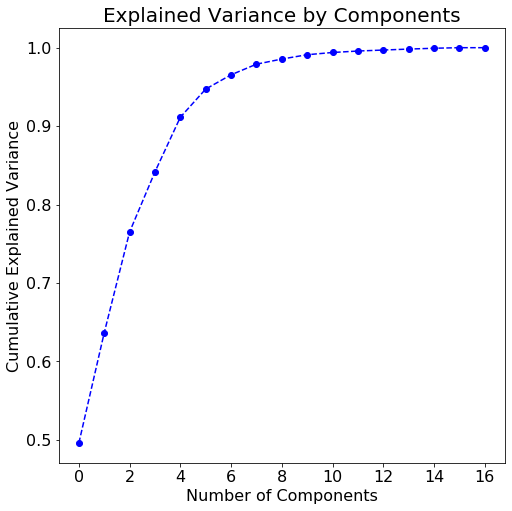

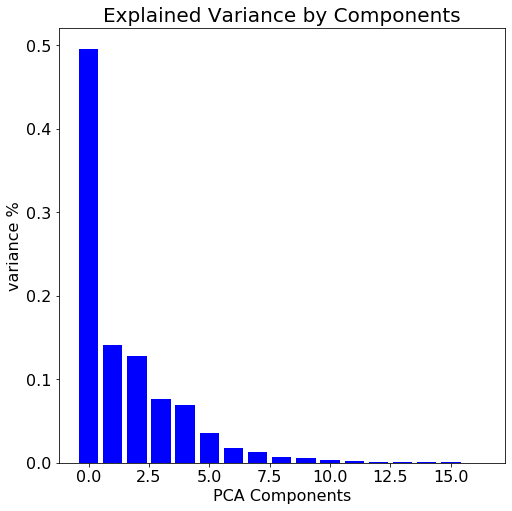

In [20]:
# Geting number of componets that explains data 
dimentionality_reduction(df_norm,'decide_pca')

In [21]:
# 2 componets are best choice here
pca_comp=dimentionality_reduction(df_norm,'pca_df',n_components=2)
print(pca_comp)

[[-0.48226858 -0.09788384]
 [-0.6087094  -0.01954948]
 [ 0.30434867  0.92107257]
 ...
 [ 0.36058707 -0.42185162]
 [-0.64593223 -0.20350377]
 [-0.09441229  0.40066071]]


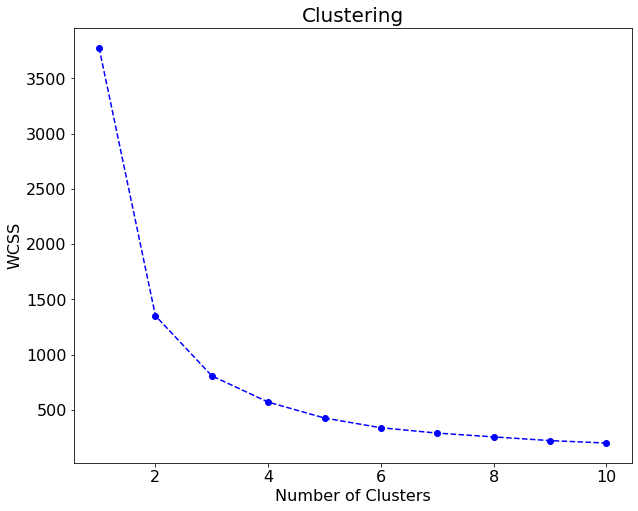

In [22]:
# Lets get optimum number of clusters 
decide_kmeans(pca_comp,'blue')

In [23]:
# Getting clusters lables for 3 culters
cluster_labels_pca=c_kmeans(pca_comp, 3)
cluster_labels_pca

array([1, 1, 0, ..., 2, 1, 1])

In [24]:
# Merge lables obtined from PCA reduction and KMeans into original data
df=merge_label(df,'PCA',cluster_labels_pca)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label_PCA
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [25]:
# Adding PCAs for purpose of visualization
df=df.merge(pd.DataFrame(pca_comp,columns=['pca1','pca2']),left_index=True,right_index=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label_PCA,pca1,pca2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,-0.482269,-0.097884
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,-0.608709,-0.019549
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,0.304349,0.921073
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1,-0.588699,-0.005678
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,-0.554502,0.052616


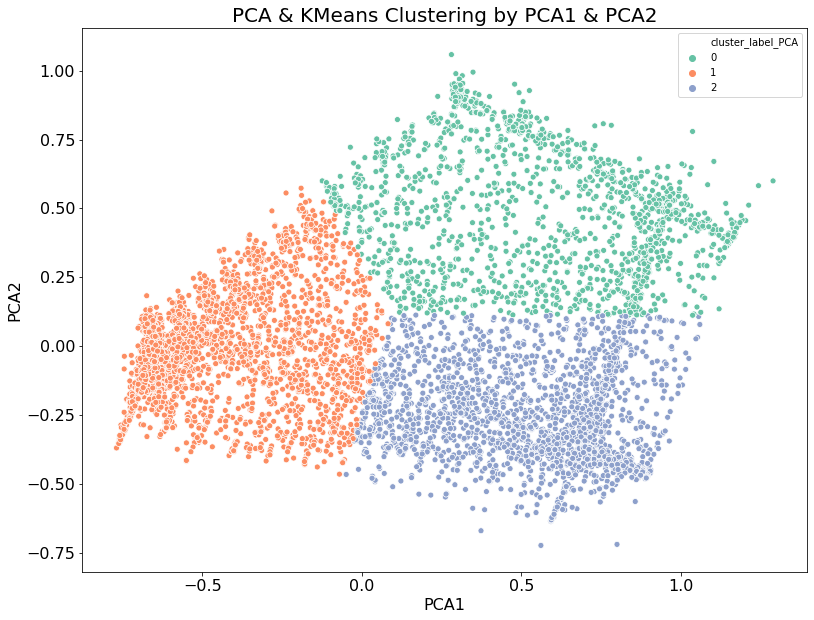

In [26]:
plt_pca_cluster(df,'cluster_label_PCA','PCA & KMeans','pca1','pca2')

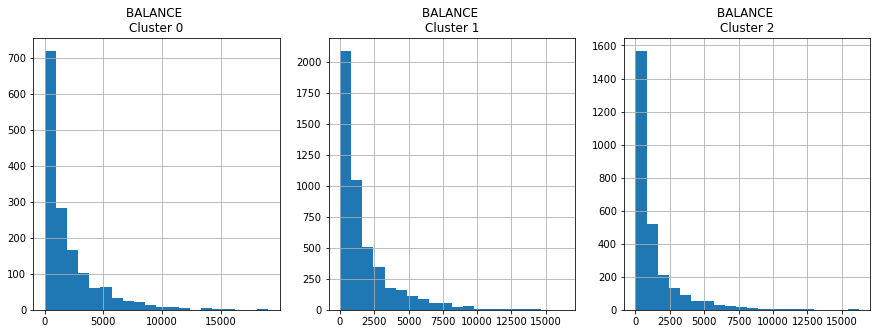

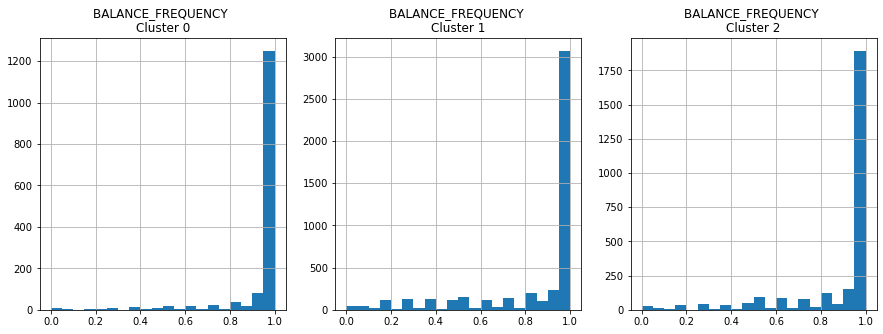

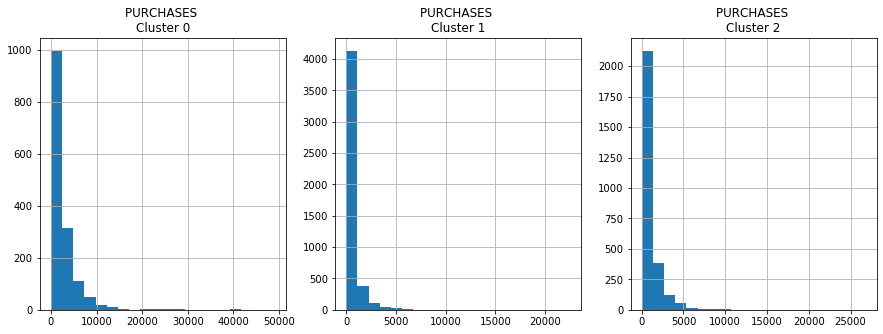

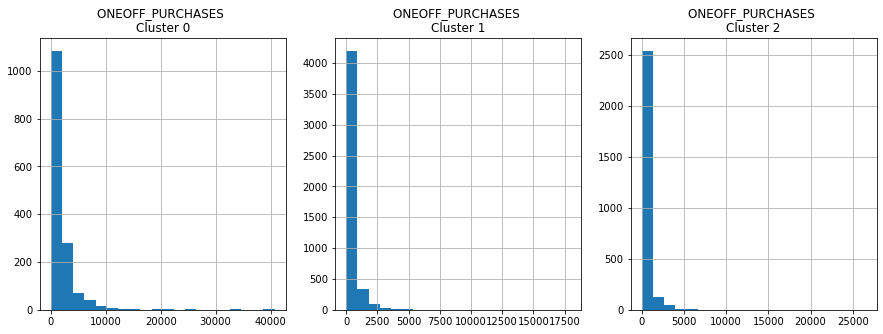

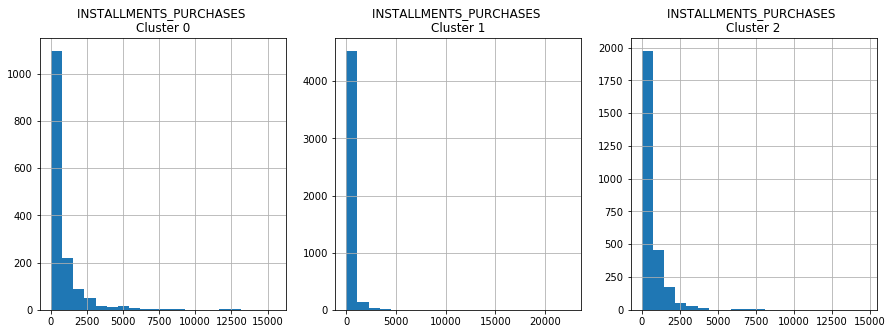

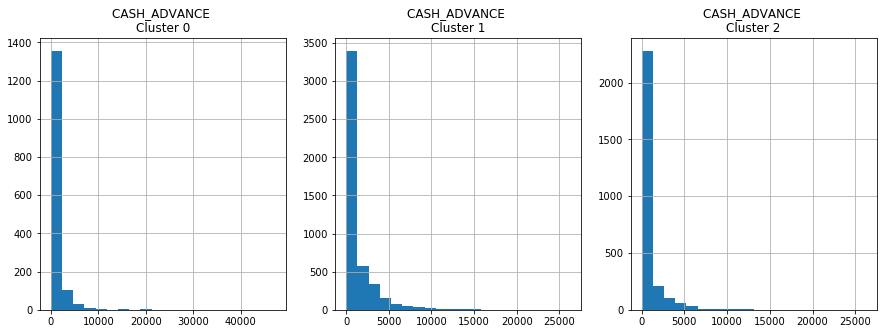

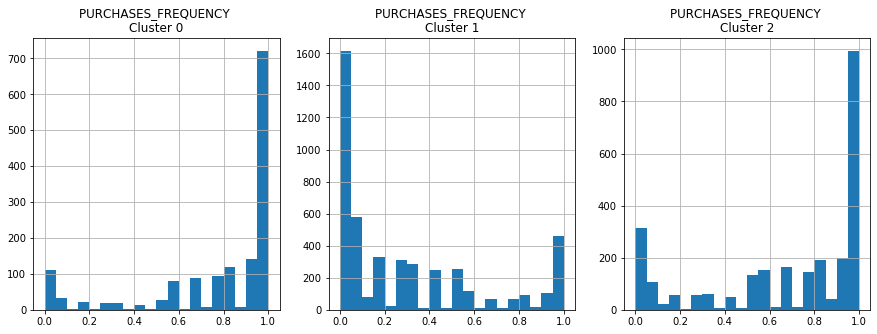

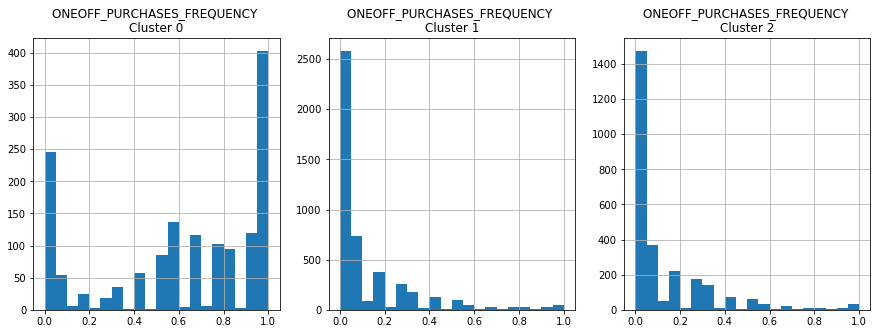

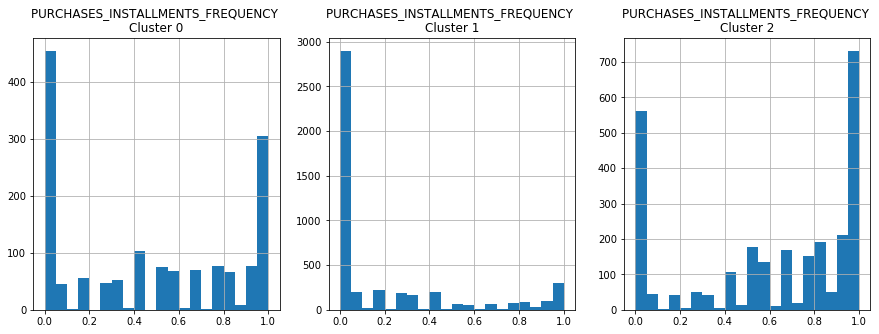

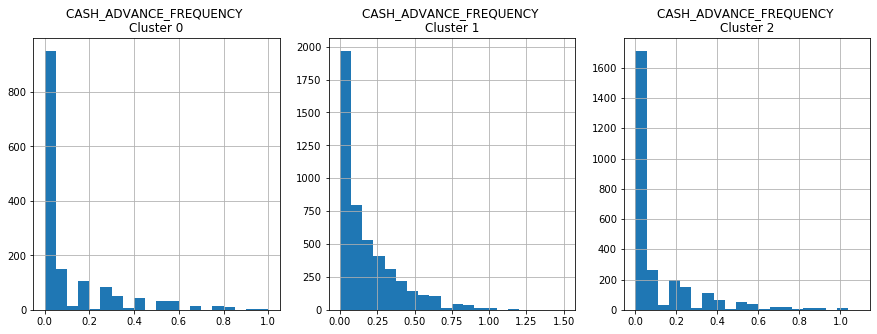

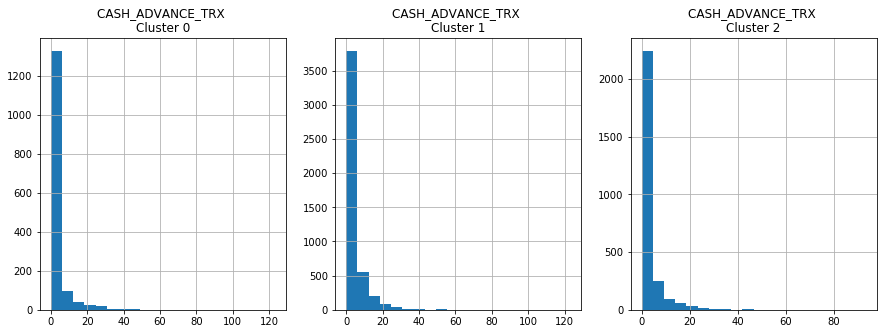

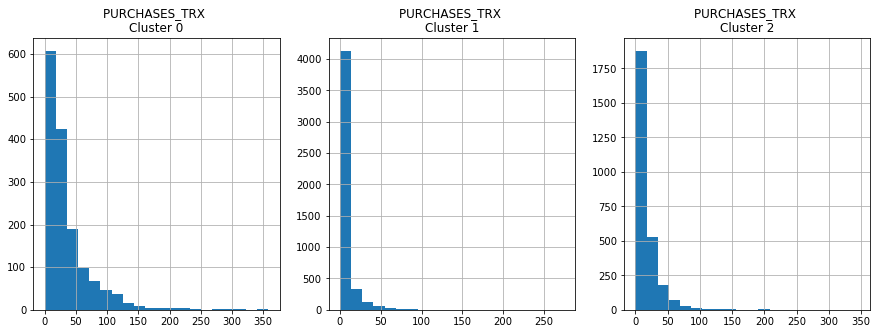

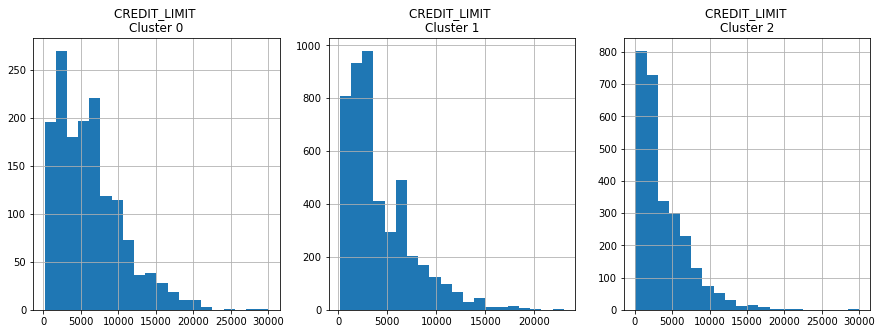

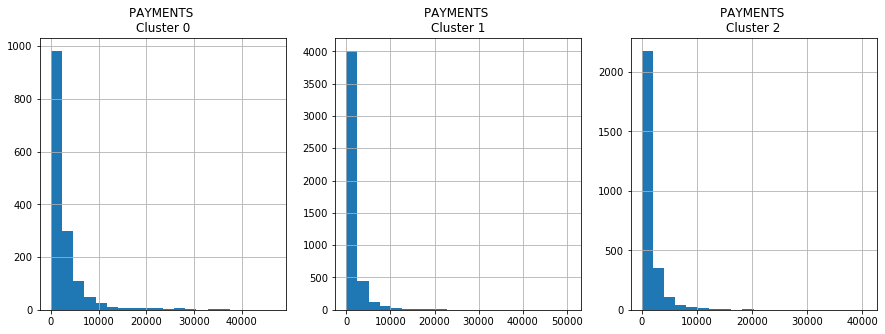

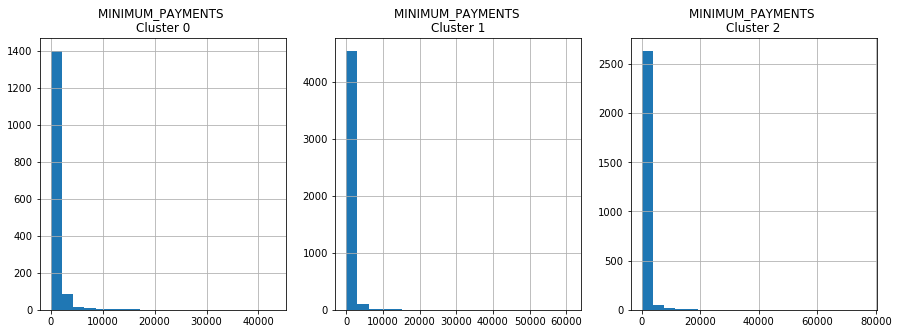

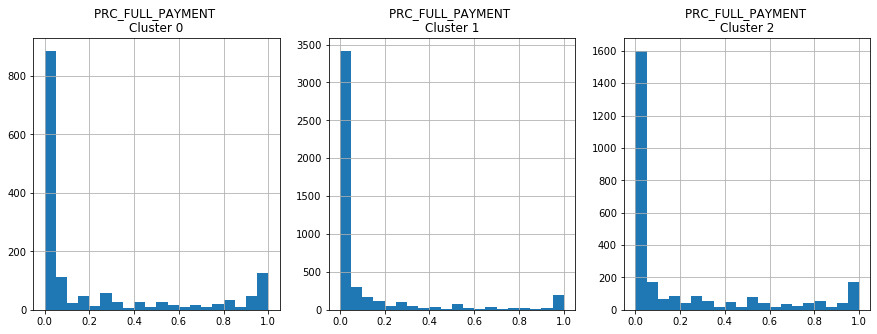

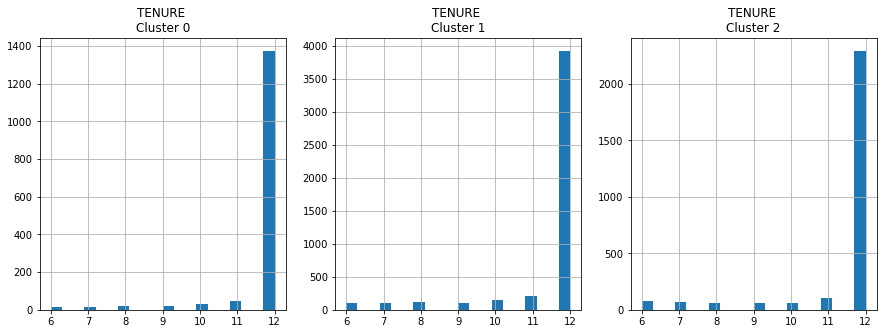

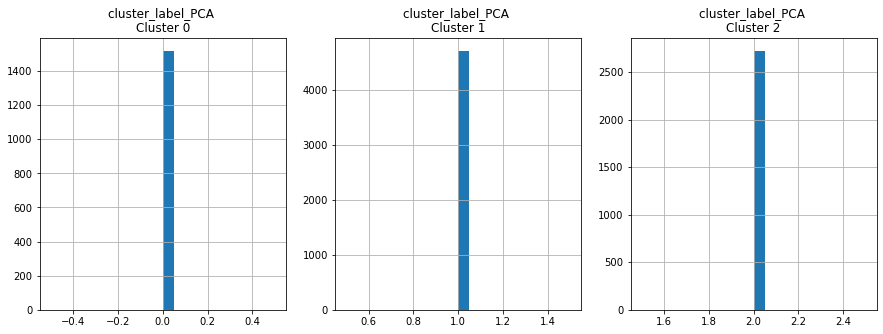

In [27]:
# plot the histogram of various clusters
cols = [col for col in df.columns if col not in ['pca1','pca2']]
for i in df[cols]: 
    plt.figure(figsize=(15,5))
    for j in range(3):
        plt.subplot(1,3,j+1)
        cluster = df[df['cluster_label_PCA'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i,j))
plt.show();

## 4.2. AutoEncoders -KMeans Clustering Approach 

In this approach, we apply dimensionality reduction technique using Deep Learning approach. AutoEncoders are type of Artificial Neural Network that are used to perform a task of data encoding aka representation learning. It consists of 3 essential layers named **Encoder, Bottleneck and Decoder**. AutoEncoder basically encodes input data then learns how to reconstruct the data back from reduced encoded representation by ignoring the noise in the data.  

After reconstructing original data in less shape (Reduce Dimensions), we will use reduced data to perform KMeans clustering. Finally, we will do 2D PCA plot to visualize different clusters. In a nutshell, the following steps will be performed: 

1. Dimensionality reduction with AutoEncoders (Reconstruct original data without noise, less dimensions). 
2. K-Means clustering by using Reconstructed data from AutoEncoder. 
3. 2D PCA plot to visualize clusters. 

In [28]:
# Setting the seeds 
tf.random.set_seed(42)
np.random.seed(42)
# Setting up deep learning layers
encoding_dim = 8
# Input columns are 17 columns
input_df = Input(shape=(17,))

# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 
# Create a fully connect ANW 
x = Dense(encoding_dim, activation='relu')(input_df)
# Decoder layers
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

# Encoder layer (middle layer) 
encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

# Decoder layers 
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# Creating full autoencoder
autoencoder = Model(input_df, decoded)

# Encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

# Showing full schema of autoencoder layers 
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 144       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4500      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000 

In [29]:
# fitting autoencoder to normalized data frame
autoencoder.fit(df_norm, df_norm, batch_size=64, epochs = 25, verbose=1)

Train on 8949 samples
Epoch 1/25
8949/8949 [==============================] - 4s 426us/sample - loss: 0.0239
Epoch 2/25
8949/8949 [==============================] - 3s 332us/sample - loss: 0.0057
Epoch 3/25
8949/8949 [==============================] - 3s 334us/sample - loss: 0.0045
Epoch 4/25
8949/8949 [==============================] - 3s 331us/sample - loss: 0.0040
Epoch 5/25
8949/8949 [==============================] - 3s 321us/sample - loss: 0.0037
Epoch 6/25
8949/8949 [==============================] - 3s 320us/sample - loss: 0.0036
Epoch 7/25
8949/8949 [==============================] - 3s 321us/sample - loss: 0.0034
Epoch 8/25
8949/8949 [==============================] - 3s 326us/sample - loss: 0.0033
Epoch 9/25
8949/8949 [==============================] - 3s 330us/sample - loss: 0.0031
Epoch 10/25
8949/8949 [==============================] - 3s 321us/sample - loss: 0.0030
Epoch 11/25
8949/8949 [==============================] - 3s 324us/sample - loss: 0.0030
Epoch 12/25
8949/89

In [30]:
# let's get re-constructed normalized input data 
enco_pred = encoder.predict(df_norm)
# Looks like encoder get rid of 7 features while reconstruct
enco_pred.shape

(8949, 10)

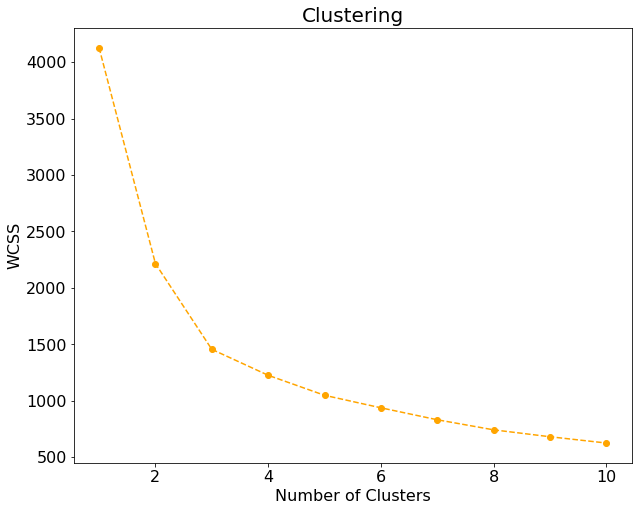

In [31]:
# Lets get the optimum number of clusters after using AutoEncoder approach  
decide_kmeans(enco_pred,'orange')

In [32]:
# Getting clusters lables for 3 culters
cluster_labels_enco=c_kmeans(enco_pred, 3)
cluster_labels_enco

array([0, 0, 2, ..., 1, 0, 0])

In [33]:
# Merge lables obtained from AutoEncoder prediction (Reduction)
df=merge_label(df,'autoencoder',cluster_labels_enco)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label_PCA,pca1,pca2,cluster_label_autoencoder
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,12,1,-0.482269,-0.097884,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,1,-0.608709,-0.019549,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,0,0.304349,0.921073,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,0.000000,312.343947,0.000000,12,1,-0.588699,-0.005678,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1,-0.554502,0.052616,0


[0.6272588  0.24735297 0.12538828 0.         0.         0.
 0.         0.         0.         0.        ]


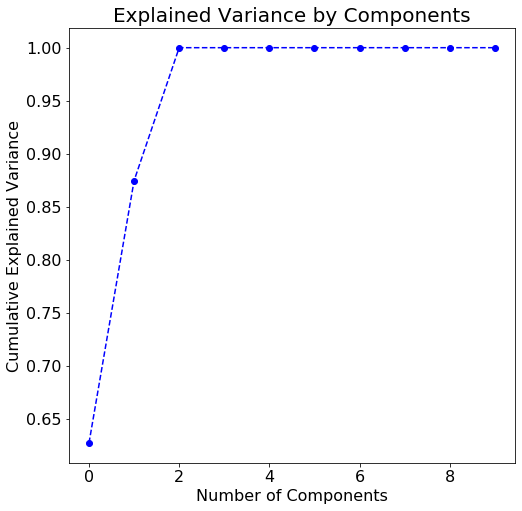

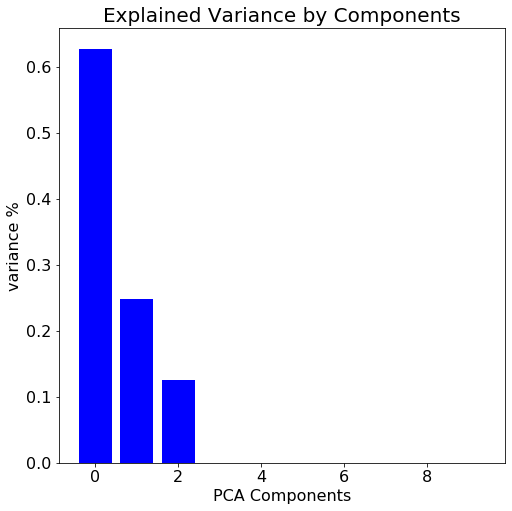

In [34]:
# Geting number of componets that explains data 
dimentionality_reduction(enco_pred,'decide_pca')

In [35]:
# componets are best choice here
pca_comp=dimentionality_reduction(enco_pred,'pca_df',n_components=2)
print(pca_comp)

[[-0.46829712  0.00367687]
 [-0.56400144  0.09823675]
 [ 0.6699778   0.7457618 ]
 ...
 [ 0.22090355 -0.16946526]
 [-0.66919595  0.2007356 ]
 [-0.27198815  0.38344297]]


In [36]:
# Adding AUtoEncoder 2D PCAs for purpose of visualization
df=df.merge(pd.DataFrame(pca_comp,columns=['pca1_enco','pca2_enco']),left_index=True,right_index=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label_PCA,pca1,pca2,cluster_label_autoencoder,pca1_enco,pca2_enco
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,1,-0.482269,-0.097884,0,-0.468297,0.003677
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,1,-0.608709,-0.019549,0,-0.564001,0.098237
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,0,0.304349,0.921073,2,0.669978,0.745762
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,312.343947,0.000000,12,1,-0.588699,-0.005678,0,-0.534670,-0.009185
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,1,-0.554502,0.052616,0,-0.414890,0.097599


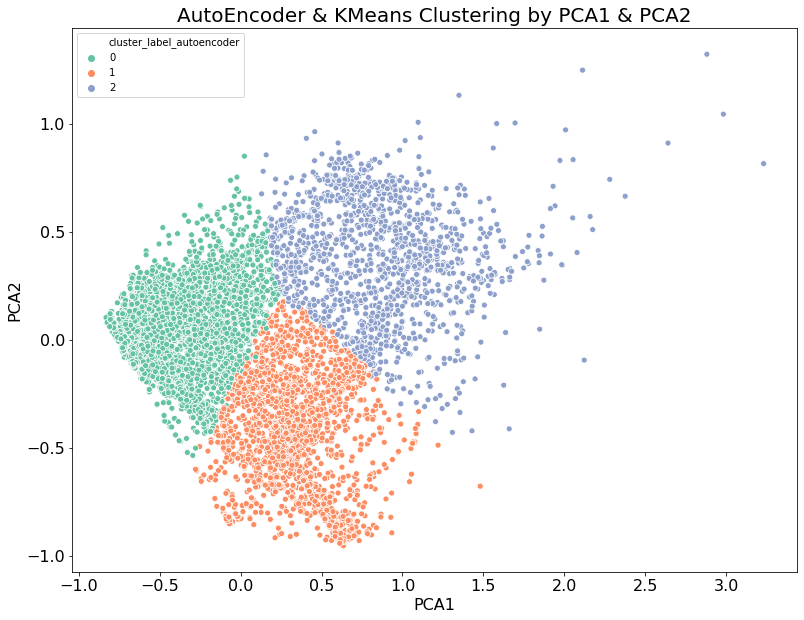

In [37]:
plt_pca_cluster(df,'cluster_label_autoencoder','AutoEncoder & KMeans','pca1_enco','pca2_enco')

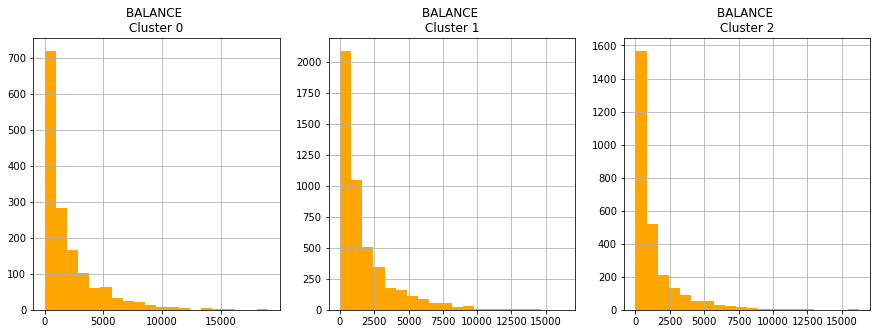

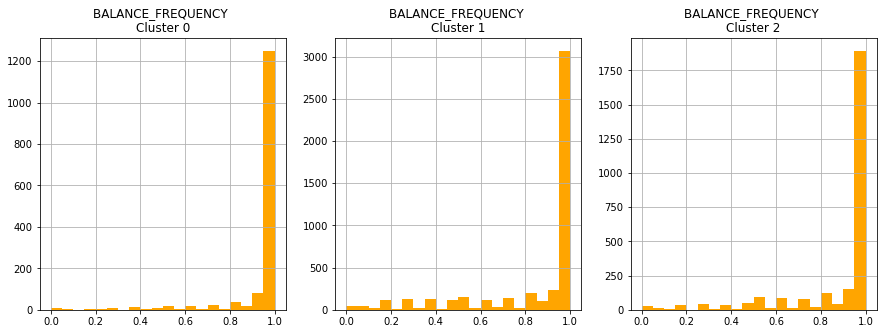

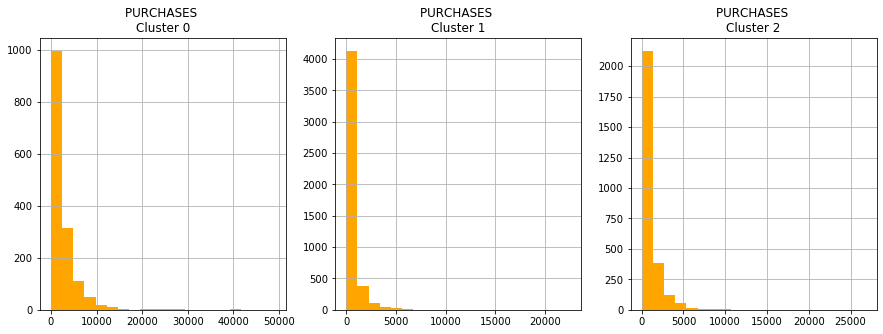

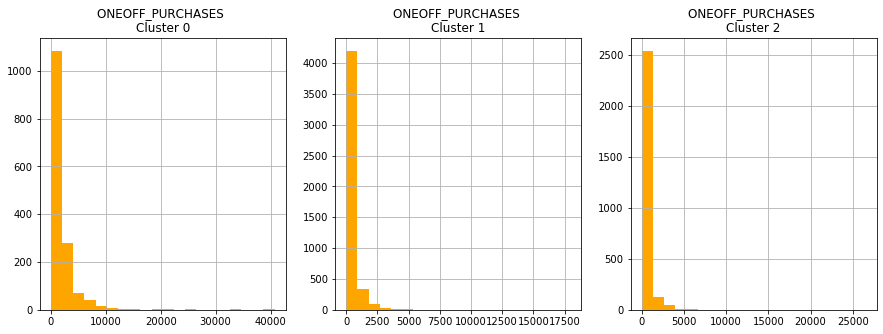

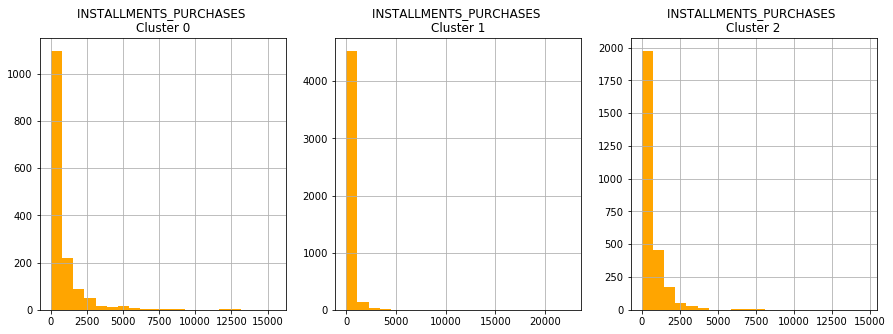

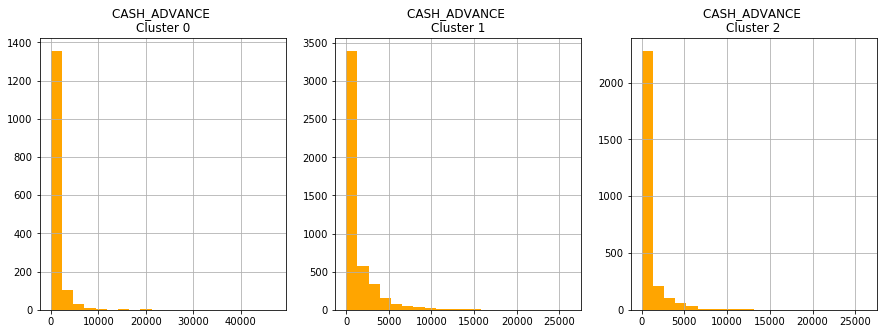

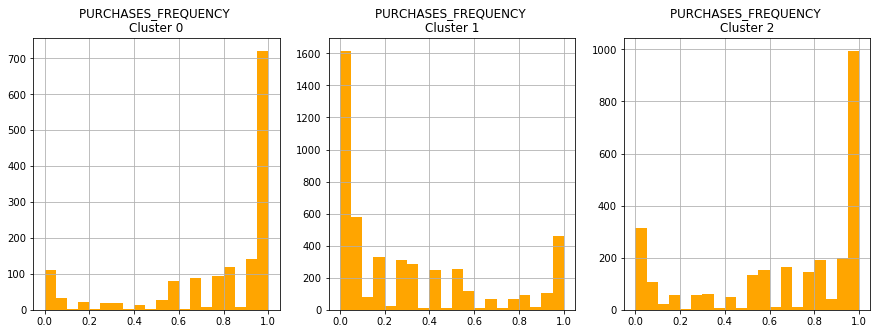

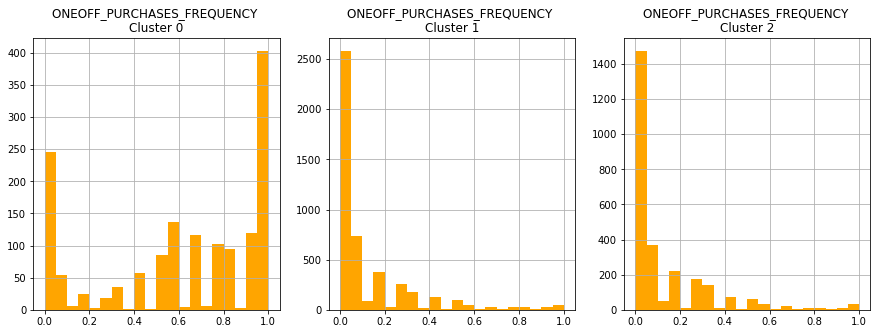

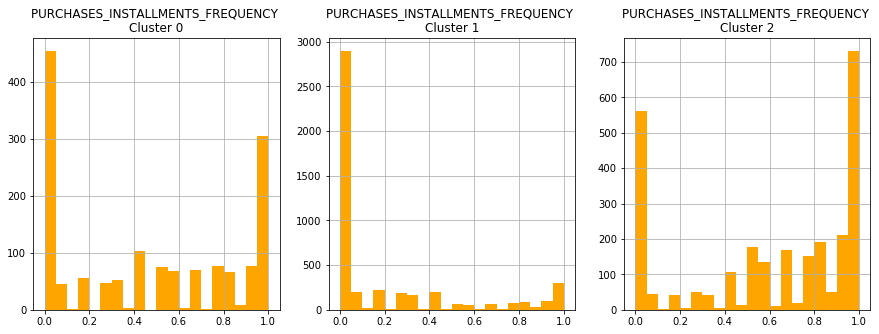

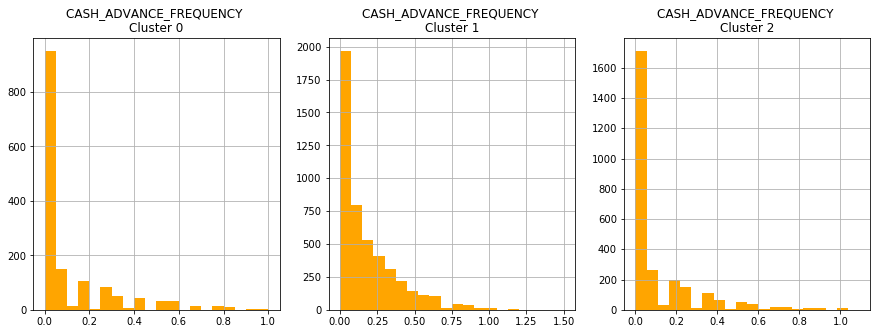

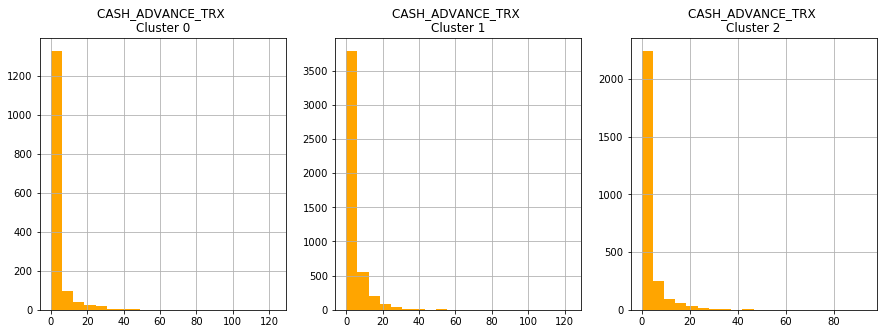

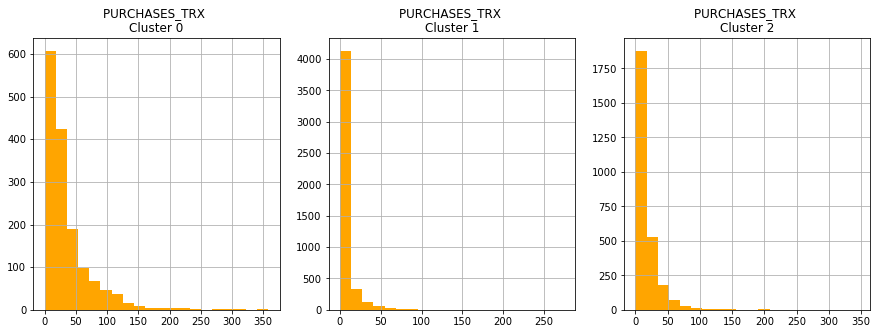

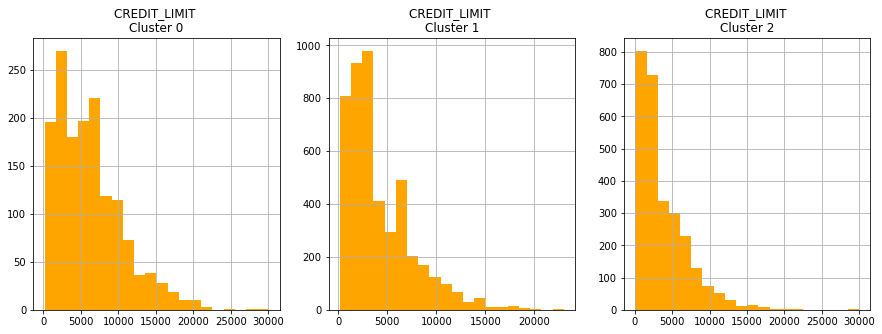

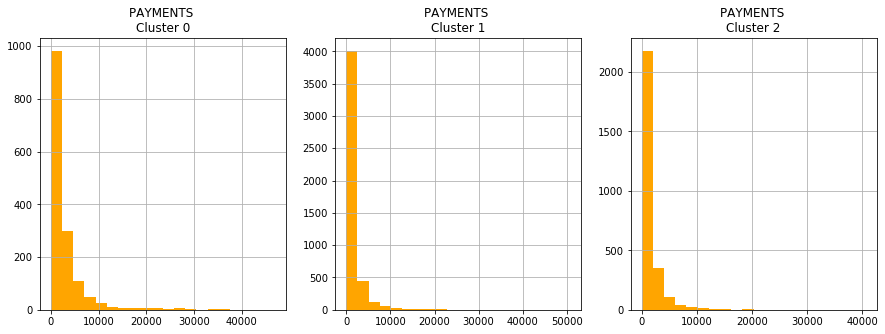

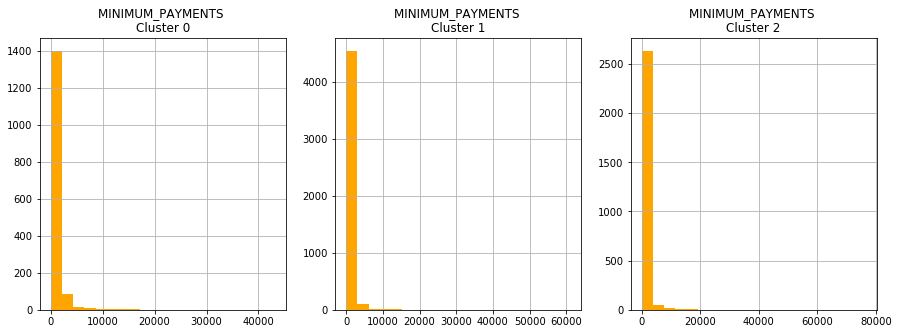

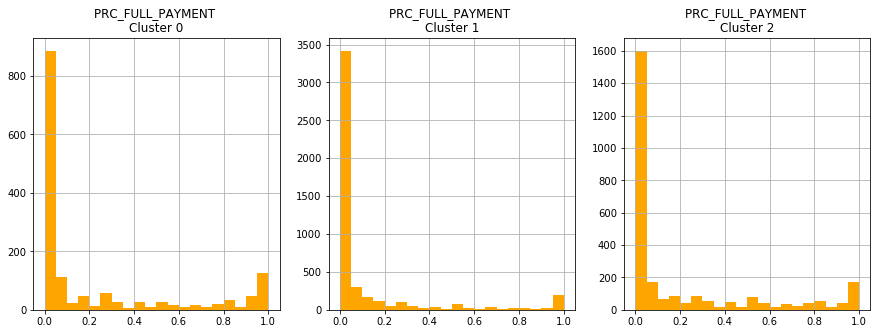

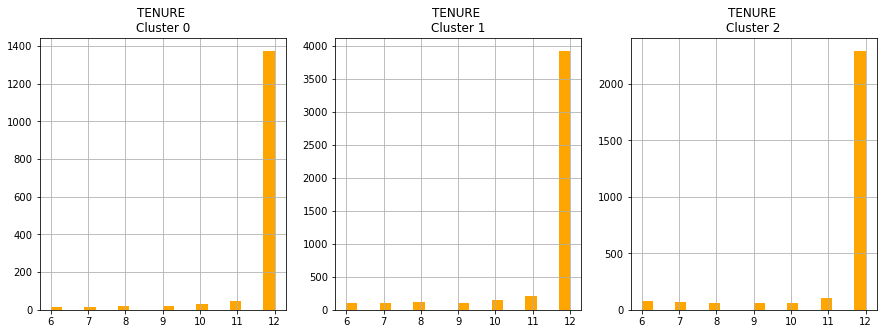

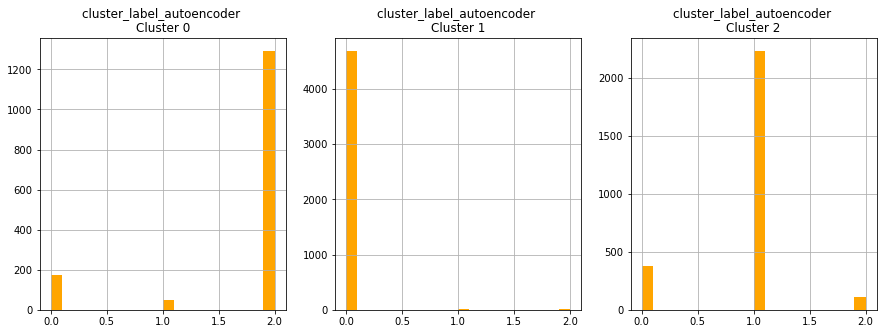

In [38]:
# plot the histogram of various clusters
cols = [col for col in df.columns if col not in ['pca1','pca2','cluster_label_PCA', 'pca1_enco', 'pca2_enco']]
for i in df[cols]: 
    plt.figure(figsize=(15,5))
    for j in range(3):
        plt.subplot(1,3,j+1)
        cluster = df[df['cluster_label_PCA'] == j]
        cluster[i].hist(bins = 20, color='orange')
        plt.title('{} \nCluster {}'.format(i,j))
plt.show();

# 5. Comparing Results: 

The purpose of this section is to explorer characteristic of each cluster obtained from the above 2 techniques. In addition, comparing similar clusters characteristics from PCA and AutoEncoders. Doing so, it will help us understand dimensionality reduction quality and its impact on KMeans algorithm. 

**Subsections:**

1. Comparing First Cluster: Which is cluster 2 (PCA-KMeans) and cluster 1 (AutoEncoders)
2. Comparing Second Cluster: Which is cluster 1 (PCA-KMeans) and cluster 0 (AutoEncoders)
3. Comparing Third Cluster: Which is cluster 0 (PCA-KMeans) and cluster 2 (AutoEncoders)

**Note:** 

We should expect similar clusters (PCA & AutoEncoder) to share a lot statistics in common. 


In [39]:
df_clusters = df.drop(['pca1','pca2','pca1_enco','pca2_enco'],axis=1)
df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label_PCA,cluster_label_autoencoder
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,0


## 5.1. Comparing First Cluster: 

* Count of observations for both clusters is different. Cluster obtained from PCA has more observations compared to AuthEncoder. 
* Average BALANCE for PCA cluster is quite higher than AutoEncoder. I would attribute that to difference in number of observations. 
* Average PURCHASES for PCA cluster is little bit higher than AutoEncoder, however, both have same maximum PURCHASE. 
* Both clusters have very low ONEOFF_PURCHASES value and both share same maximum ONEOFF_PURCHASES value. 
* Average INSTALLMENTS_PURCHASES for PCA cluster is little bit higher than AutoEncoder. It also has relatively higher maximum value. 
* Both clusters shared same CASH_ADVANCE maximum value with minor difference in average value. 
* Both clusters shared same CASH_ADVANCE_TRX & PURCHASES_TRX average and maximum value. 
* Both clusters have same rate of PRC_FULL_PAYMENT. This group average full pay of 20%. 

In [40]:
df_clusters[df_clusters['cluster_label_PCA']== 2].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label_PCA,cluster_label_autoencoder
count,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000
mean,1213.456398,0.888139,959.283544,342.973676,616.595865,690.170963,0.676225,0.124450,0.601300,0.103298,2.526258,17.241278,3979.336423,1473.914578,869.433547,0.200441,11.468234,2.0,0.903415
std,1795.285409,0.219453,1451.485667,991.177823,913.796011,1685.777054,0.360091,0.201635,0.380746,0.184580,5.980401,22.379356,3262.387439,2280.682426,2778.134046,0.320238,1.426629,0.0,0.413582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,2.0,0.000000
25%,73.507275,0.900000,189.960000,0.000000,88.060000,0.000000,0.454545,0.000000,0.250000,0.000000,0.000000,6.000000,1500.000000,363.855526,160.910745,0.000000,12.000000,2.0,1.000000
50%,528.023703,1.000000,515.420000,0.000000,343.560000,0.000000,0.833333,0.000000,0.700000,0.000000,0.000000,12.000000,3000.000000,803.881382,238.195134,0.000000,12.000000,2.0,1.000000
75%,1524.235249,1.000000,1197.275000,317.620000,804.355000,552.841860,1.000000,0.166667,1.000000,0.166667,2.000000,21.000000,6000.000000,1661.107764,697.707256,0.300000,12.000000,2.0,1.000000
max,16259.448570,1.000000,26784.620000,26514.320000,14686.100000,26194.049540,1.000000,1.000000,1.000000,1.090909,93.000000,347.000000,30000.000000,40627.595240,76406.207520,1.000000,12.000000,2.0,2.000000


In [41]:
df_clusters[df_clusters['cluster_label_autoencoder']== 1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label_PCA,cluster_label_autoencoder
count,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.000000,2289.0
mean,1239.236332,0.894387,930.299742,334.868877,595.771088,730.093786,0.690702,0.121747,0.614297,0.108678,2.645697,16.902578,3893.988708,1449.759252,901.047931,0.197148,11.437746,1.953255,1.0
std,1832.383416,0.216297,1382.207535,1026.875494,815.663129,1760.560304,0.364610,0.199895,0.386568,0.188234,6.144162,19.976924,3249.779842,2274.179383,2932.852613,0.320261,1.466016,0.297130,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,1.0
25%,74.015300,0.909091,194.100000,0.000000,81.780000,0.000000,0.416667,0.000000,0.250000,0.000000,0.000000,6.000000,1500.000000,364.834065,161.467632,0.000000,12.000000,2.000000,1.0
50%,535.278586,1.000000,520.000000,0.000000,350.000000,0.000000,0.833333,0.000000,0.750000,0.000000,0.000000,12.000000,3000.000000,791.526478,247.041179,0.000000,12.000000,2.000000,1.0
75%,1552.687961,1.000000,1194.960000,306.000000,799.920000,610.089280,1.000000,0.166667,1.000000,0.166667,3.000000,22.000000,5500.000000,1653.941553,708.609079,0.285714,12.000000,2.000000,1.0
max,15532.339720,1.000000,26784.620000,26514.320000,12375.000000,26194.049540,1.000000,1.000000,1.000000,1.090909,93.000000,254.000000,30000.000000,40627.595240,76406.207520,1.000000,12.000000,2.000000,1.0


## 5.2. Comparing Second Cluster: 

* Count of observations for both clusters is different. Cluster obtained from PCA has less observations compared to AuthEncoder. 
* Average BALANCE for PCA cluster is quite higher than AutoEncoder although count for PCA is less than AutoEncoder. This could be attributed to existance of large values in PCA cluster. 
* Average PURCHASES for PCA cluster is little bit lower than AutoEncoder, however, both have same maximum PURCHASE. 
* Both clusters have very low ONEOFF_PURCHASES value and both share same maximum ONEOFF_PURCHASES value. 
* There is big difference in average INSTALLMENTS_PURCHASES, PCA cluster is lower than AutoEncoder.  
* Both clusters share same CASH_ADVANCE maximum value with minor difference in average value. 
* Both clusters almost share same CASH_ADVANCE_TRX & PURCHASES_TRX average and maximum value. 
* Both clusters have same rate of PRC_FULL_PAYMENT. This group average full pay of 10%. 

In [42]:
df_clusters[df_clusters['cluster_label_PCA']== 1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label_PCA,cluster_label_autoencoder
count,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.0,4707.000000
mean,1639.723820,0.849919,498.540025,313.055432,185.812600,1194.735588,0.289953,0.115248,0.194222,0.162371,3.834927,6.622265,4192.366216,1500.654914,822.957833,0.106616,11.478861,1.0,0.004886
std,2064.574829,0.260481,1072.613991,835.602929,579.761914,2163.637014,0.335581,0.193815,0.318172,0.207807,7.183686,12.919184,3375.145047,2488.123107,2165.439417,0.246119,1.373095,0.0,0.090903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000,1.0,0.000000
25%,147.549631,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,346.403201,172.136660,0.000000,12.000000,1.0,0.000000
50%,995.323626,1.000000,144.400000,0.000000,0.000000,190.643054,0.166667,0.000000,0.000000,0.083333,1.000000,2.000000,3000.000000,725.815797,330.627174,0.000000,12.000000,1.0,0.000000
75%,2222.375176,1.000000,550.040000,286.405000,159.220000,1537.278435,0.500000,0.166667,0.300000,0.250000,5.000000,8.000000,6000.000000,1636.939921,804.140796,0.083333,12.000000,1.0,0.000000
max,16304.889250,1.000000,22500.000000,17945.000000,22500.000000,26268.699890,1.000000,1.000000,1.000000,1.500000,123.000000,274.000000,23000.000000,50721.483360,61031.618600,1.000000,12.000000,1.0,2.000000


In [43]:
df_clusters[df_clusters['cluster_label_autoencoder']== 0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label_PCA,cluster_label_autoencoder
count,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.0
mean,1580.250360,0.850685,527.697817,322.459968,205.583689,1128.906214,0.315630,0.121749,0.214991,0.155320,3.661773,7.214299,4161.679830,1469.723117,806.743527,0.110545,11.475882,1.038322,0.0
std,2007.032717,0.257444,1067.263708,826.210690,584.874335,2113.921255,0.339967,0.200308,0.322640,0.205521,6.993813,13.292126,3341.779028,2440.930993,2109.966511,0.247743,1.378308,0.322467,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000,0.000000,0.0
25%,135.765325,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,341.459733,170.895638,0.000000,12.000000,1.000000,0.0
50%,961.369596,1.000000,171.000000,0.000000,0.000000,144.330518,0.166667,0.000000,0.000000,0.083333,1.000000,3.000000,3000.000000,717.601973,318.949630,0.000000,12.000000,1.000000,0.0
75%,2101.047620,1.000000,605.520000,309.660000,206.690000,1423.527628,0.500000,0.166667,0.416667,0.250000,5.000000,9.000000,6000.000000,1616.215963,786.946437,0.083333,12.000000,1.000000,0.0
max,16304.889250,1.000000,22500.000000,17945.000000,22500.000000,26268.699890,1.000000,1.000000,1.000000,1.500000,123.000000,274.000000,23000.000000,50721.483360,61031.618600,1.000000,12.000000,2.000000,0.0


## 5.3. Comparing Third Cluster: 

* Count of observations for both clusters is different. Cluster obtained from PCA relatively has more observations compared to AuthEncoder. 
* Average BALANCE for PCA cluster is quite lower than AutoEncoder although count for PCA is more than AutoEncoder. This could be attributed to existance of small values in PCA cluster. 
* Average PURCHASES for PCA cluster is little bit lower than AutoEncoder, however, both have same maximum PURCHASE. 
* Both clusters have very relatively high ONEOFF_PURCHASES value and both share same maximum ONEOFF_PURCHASES value. 
* There is big difference in average INSTALLMENTS_PURCHASES, PCA cluster is lower than AutoEncoder.  
* Both clusters share same CASH_ADVANCE maximum value with minor difference in average value. 
* Both clusters almost share same CASH_ADVANCE_TRX & PURCHASES_TRX average and maximum value. 
* Full payment rate for PCA cluster is less than AutoEncoder cluster. The PCA cluster is 21.6% while AutoEncoder is 24.4%

In [44]:
df_clusters[df_clusters['cluster_label_PCA']== 0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label_PCA,cluster_label_autoencoder
count,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.0,1518.000000
mean,1962.606591,0.943194,2647.452582,1906.292477,741.399848,828.476034,0.778526,0.612636,0.467834,0.107695,2.729908,35.250988,6357.330219,2921.286689,870.015008,0.216143,11.731884,0.0,1.735178
std,2480.655551,0.164130,4010.203360,3200.466911,1393.119820,2450.669460,0.313731,0.364032,0.395239,0.190410,6.943850,39.897391,4407.536883,4381.808952,1924.430469,0.343580,0.985015,0.0,0.653343
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,2.167809,0.000000,6.000000,0.0,0.000000
25%,268.971193,1.000000,549.497500,333.005000,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,0.000000,12.000000,3000.000000,706.124426,184.863248,0.000000,12.000000,0.0,2.000000
50%,1033.963624,1.000000,1568.315000,1073.880000,272.400000,0.000000,0.916667,0.666667,0.416667,0.000000,0.000000,23.000000,6000.000000,1613.340309,328.052863,0.000000,12.000000,0.0,2.000000
75%,2629.574427,1.000000,3253.420000,2292.475000,877.395000,628.719984,1.000000,1.000000,0.906818,0.166667,2.000000,45.000000,8500.000000,3314.805916,910.255383,0.300000,12.000000,0.0,2.000000
max,19043.138560,1.000000,49039.570000,40761.250000,15497.190000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,46930.598240,43132.728230,1.000000,12.000000,0.0,2.000000


In [45]:
df_clusters[df_clusters['cluster_label_autoencoder']== 2].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_label_PCA,cluster_label_autoencoder
count,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.0
mean,2034.394268,0.948828,2885.685184,2010.893798,874.857815,826.226869,0.814340,0.632302,0.514824,0.102986,2.695898,38.968175,6703.166388,3171.406362,896.707456,0.243751,11.807638,0.166902,2.0
std,2580.409387,0.158461,4146.954862,3288.926109,1550.886193,2458.291715,0.304158,0.360936,0.406551,0.189208,7.126659,42.497621,4406.711036,4487.047030,2000.220133,0.360372,0.818089,0.548182,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,2.167809,0.000000,6.000000,0.000000,2.0
25%,258.457734,1.000000,641.817500,407.087500,0.000000,0.000000,0.750000,0.416667,0.000000,0.000000,0.000000,12.000000,3000.000000,833.182293,183.991841,0.000000,12.000000,0.000000,2.0
50%,1021.129218,1.000000,1830.385000,1169.950000,376.310000,0.000000,1.000000,0.750000,0.583333,0.000000,0.000000,26.000000,6000.000000,1785.512419,313.980229,0.000000,12.000000,0.000000,2.0
75%,2772.573506,1.000000,3607.467500,2415.407500,1065.152500,549.290041,1.000000,1.000000,1.000000,0.166667,2.000000,50.000000,9000.000000,3715.926684,948.971475,0.416667,12.000000,0.000000,2.0
max,19043.138560,1.000000,49039.570000,40761.250000,15497.190000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,46930.598240,43132.728230,1.000000,12.000000,2.000000,2.0


# 6. Conclusion: 

As the business objective aims to perform customer segmentation to help marketing team launch a targeted ads marketing campaign by segmenting customers into potential groups, it is important to point out that both above algorithm techniques achieved a high level of dimensionality reduction and clustering performance. I would not recommend one approach over the second as both models give similar results. However, I would give my insights based on clusters characteristics obtained above. 


**Group 1:** 
The following group (class 2 in PCA) and (class 1 in AutoEncoder) has the following characteristics: 
1. It has the lowest balance amount left in the account compared to other 2 clusters. 
2. It has the middle amount of purchases made, the middle purchases frequency and the middle number of purchase transactions made. 
3. It has the middle maximum purchase done in one-go. 
4. It has the lowest cash in advance given by the user as well as the lowest number of transactions made with cash in advance. 
5. It has the middle amount of purchase done in installment. 
6. It has the lowest limit of credit card for user.
7. It has the lowest amount of payment done by user.
8. It has the middle percent of full payment paid by user. 

**Group 2:** 
The following group (class 1 in PCA) and (class 0 in AutoEncoder) has the following characteristics: 
1. It has the middle balance amount left in the account. 
2. It has the lowest amount of purchases made, the lowest purchases frequency and the lowest number of purchase transactions made. 
3. It has the lowest maximum purchase done in one-go. 
4. It has the highest cash in advance given by the user as well as the highest number of transactions made with cash in advance. 
5. It has the lowest amount of purchase done in installment. 
6. It has the middle limit of credit card for user.
7. It has the middle amount of payment done by user.
8. It has the lowest percent of full payment paid by user. 

**Group 3:** 
The following group (class 0 in PCA) and (class 2 in AutoEncoder) has the following characteristics: 
1. It has the highest balance amount left in the account. 
2. It has the highest amount of purchases made, the highest purchases frequency and the highest number of purchase transactions made. 
3. It has the highest maximum purchase done in one-go. 
4. It has the middle cash in advance given by the user as well as the middle number of transactions made with cash in advance. 
5. It has the highest amount of purchase done in installment. 
6. It has the highest limit of credit card for user.
7. It has the highest amount of payment done by user.
8. It has the highest percent of full payment paid by user. 

# 7. Business Recommendation

I would recommend to target Group 3 population as those ones are having highest overall purchase records, they have a lot of cash (Installment purchases lowest) and has the highest percent (rate) of full payment paid by users compared to other 2 groups. 

For Group 1 & 2, I would say the almost follow same spending habits, only minor differences. However, Group 2 has the highest CASH in ADVANCE or short term load from credit card, therefore, if bank want to benefit from interest rate from money withdraw (As far as I recall, loan interest rate from credit card in NYC is between 19.99% - 24%), then target those group with purchase ads than Group 1. 

Eventually, it is matter of trad off for bank. Does bank want cash money or load interest rate.More details are left for the marketing department team!  